In [ ]:
!pip install google_play_scraper
!pip install textblob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all
from textblob import TextBlob
import string
import nltk
from nltk.corpus import stopwords

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.7 MB/s eta 0:00:00


In [ ]:
satusehat_reviews = reviews_all(
    'com.telkom.tracencare',
    sleep_milliseconds=0,
    lang='id',
    sort=Sort.NEWEST,
)

In [ ]:
# Save the reviews into a dataframe
df_satusehat = pd.DataFrame(np.array(satusehat_reviews), columns=['content'])
df_satusehat = df_satusehat.join(pd.DataFrame(df_satusehat.pop('content').tolist()))

In [ ]:
# Save the dataframe to CSV with escapechar
df_satusehat.to_csv('satusehat_reviews.csv', index=False, escapechar='\\')
df_satusehat.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,66e86bcd-f5aa-4d49-9131-c26c9f06296e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Lupa pin saya masuk dg cara email ga bisa. mun...,1,0,5.2.1,2024-11-03 14:32:55,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 14:35:44,5.2.1
1,716f5731-9ee8-439e-bbf6-6d1e8907ce8e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Buruk,1,0,7.5.0,2024-11-03 12:30:42,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 12:33:03,7.5.0
2,dc57128a-304b-4074-9969-5bff5493f19c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Ga bisa unduh sertif vaksin, percuma scan barc...",1,0,7.5.0,2024-11-03 12:16:04,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 12:18:23,7.5.0
3,09dbeb9f-88bb-40ed-a7ab-bb524c92f99f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Update kartu sehat susahhhhhhhh ....bgt, 😭😭",1,0,7.5.0,2024-11-03 11:48:07,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 11:53:56,7.5.0
4,780a524c-8706-4638-bbc3-c492122682e8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasi ga laku makin gila Mau login peduli l...,1,0,None,2024-11-03 08:14:08,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 08:14:53,None


In [ ]:
# Check the structure of the dataframe
df_satusehat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389118 entries, 0 to 389117
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              389118 non-null  object        
 1   userName              389118 non-null  object        
 2   userImage             389118 non-null  object        
 3   content               389118 non-null  object        
 4   score                 389118 non-null  int64         
 5   thumbsUpCount         389118 non-null  int64         
 6   reviewCreatedVersion  324574 non-null  object        
 7   at                    389118 non-null  datetime64[ns]
 8   replyContent          251227 non-null  object        
 9   repliedAt             251227 non-null  datetime64[ns]
 10  appVersion            324574 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 32.7+ MB


In [ ]:
# Check unique versions of the app in reviews
print(df_satusehat.reviewCreatedVersion.unique())
print(df_satusehat.reviewCreatedVersion.nunique())

['5.2.1' '7.5.0' None '7.4.0' '6.5.0' '4.0.9' '5.9.1' '4.4.4' '7.3.1'
 '3.4.6' '7.0.0' '6.2.1' '7.0.1' '7.2.2' '7.1.2' '5.10.2' '4.1.16' '4.3.0'
 '4.0.7' '4.5.2' '6.2.2' '7.1.0' '6.2.0' '7.2.1' '5.5.2' '4.0.2' '4.1.0'
 '5.12.1' '6.4.0' '4.0.6' '3.0.2' '5.14.1' '5.7.1' '4.6.0' '5.4.4' '6.3.0'
 '5.12.0' '4.5.6' '5.13.1' '5.13.0' '7.1.1' '4.4.8' '6.1.0' '7.2.0'
 '4.4.3.1' '4.5.0' '4.4.3.2' '5.14.0' '4.5.9.1' '5.2.0' '6.0.1' '5.3.1'
 '5.8.0' '4.4.7' '4.4.1' '3.4.1' '4.5.9' '4.2.0' '4.4.6' '5.9.0' '4.5.8'
 '5.7.0' '4.5.4' '4.1.1' '4.0.8' '5.10.0' '4.4.5' '4.5.3' '5.8.1' '5.11.0'
 '5.11.1' '3.4.5' '4.0.91' '4.5.1' '4.2.1' '4.0.5' '4.5.3.1' '1.2.0'
 '5.6.0' '5.10.1' '4.5.5' '4.5.7' '5.0.0' '5.3.2' '3.3.5' '3.4.4' '5.5.0'
 '4.4' '3.4.0' '4.4.3' '5.5.1' '2.1.4' '3.3.6' '3.4.3' '3.2.6' '3.4.2'
 '2.2.2' '3.3.4' '2.3.0' '3.1.1' '2.0.0' '1.3.1' '1.0.1' '2.0.3' '1.4.0'
 '3.1.3' '2.0.2' '2.1.3' '2.2.1' '3.1.2' '1.0' '1.3.0' '2.4.1' '1.1.0'
 '3.0.1' '3.1.0' '2.2.0' '2.1.2']
117


In [ ]:
# Show specific columns
df_satusehat.loc[:, ["content", "score", "thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,Lupa pin saya masuk dg cara email ga bisa. mun...,1,0,5.2.1,2024-11-03 14:32:55,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 14:35:44
1,Buruk,1,0,7.5.0,2024-11-03 12:30:42,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 12:33:03
2,"Ga bisa unduh sertif vaksin, percuma scan barc...",1,0,7.5.0,2024-11-03 12:16:04,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 12:18:23
3,"Update kartu sehat susahhhhhhhh ....bgt, 😭😭",1,0,7.5.0,2024-11-03 11:48:07,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 11:53:56
4,Aplikasi ga laku makin gila Mau login peduli l...,1,0,None,2024-11-03 08:14:08,"Halo Healthies,\nTerima kasih telah meluangkan...",2024-11-03 08:14:53
...,...,...,...,...,...,...,...
389113,"Aplikasi tidak bisa di Akses, loginnya ajh susah",1,0,1.0.1,2020-03-31 08:25:36,"Halo, \nTerima kasih atas tanggapan dan dukung...",2020-03-31 10:44:13
389114,Gak pernah becus dev yg 1 ini klu bikin app..,1,0,1.0.1,2020-03-31 08:24:24,None,NaT
389115,"Kenapa saat saya memverifikasi nomor hp, dan s...",3,0,1.0.1,2020-03-31 08:20:34,"Halo Rezha RF, \nTerima kasih atas tanggapan d...",2020-03-31 10:45:19
389116,Saat pemasukan otp tidak bsa masuk padahal otp...,3,4,1.0.1,2020-03-31 08:19:25,"Halo, \nTerima kasih atas tanggapan dan dukung...",2020-03-31 10:46:09


In [ ]:
# Split data into before and after 1 March 2023
date_split = pd.Timestamp('2023-03-01')
before_march = df_satusehat[df_satusehat['at'] < date_split]
after_march = df_satusehat[df_satusehat['at'] >= date_split]

In [ ]:
# Sentiment analysis for both subsets
before_march['sentiment_polarity'] = before_march['content'].apply(lambda x: TextBlob(x).polarity)
before_march['sentiment_subjective'] = before_march['content'].apply(lambda x: TextBlob(x).subjectivity)
after_march['sentiment_polarity'] = after_march['content'].apply(lambda x: TextBlob(x).polarity)
after_march['sentiment_subjective'] = after_march['content'].apply(lambda x: TextBlob(x).subjectivity)

<ipython-input-13-9647a4d4194f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_march['sentiment_polarity'] = before_march['content'].apply(lambda x: TextBlob(x).polarity)
<ipython-input-13-9647a4d4194f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_march['sentiment_subjective'] = before_march['content'].apply(lambda x: TextBlob(x).subjectivity)
<ipython-input-13-9647a4d4194f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [ ]:
# Add sentiment rating columns
before_march['sentiment_rating'] = before_march['score'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))
after_march['sentiment_rating'] = after_march['score'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))

<ipython-input-14-e209a2b792ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_march['sentiment_rating'] = before_march['score'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))
<ipython-input-14-e209a2b792ec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_march['sentiment_rating'] = after_march['score'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))


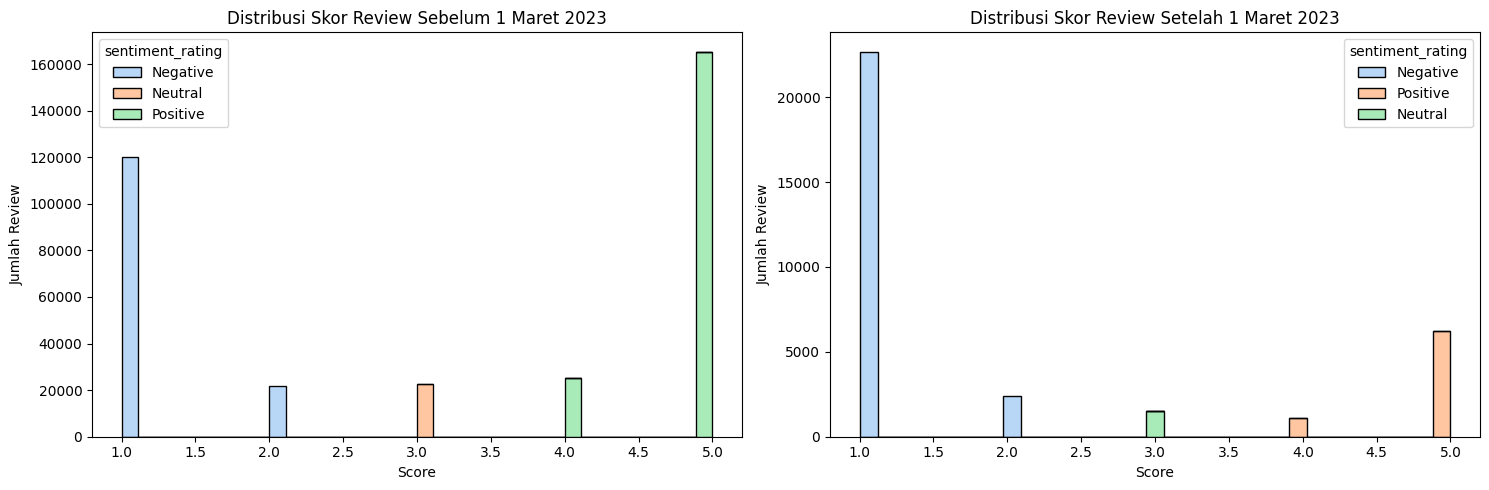

In [ ]:
# Plotting sentiment distribution before and after 1 March 2023
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=before_march, x='score', hue='sentiment_rating', multiple='stack', palette='pastel')
plt.title('Distribusi Skor Review Sebelum 1 Maret 2023')
plt.xlabel('Score')
plt.ylabel('Jumlah Review')

plt.subplot(1, 2, 2)
sns.histplot(data=after_march, x='score', hue='sentiment_rating', multiple='stack', palette='pastel')
plt.title('Distribusi Skor Review Setelah 1 Maret 2023')
plt.xlabel('Score')
plt.ylabel('Jumlah Review')

plt.tight_layout()
plt.show()

<ipython-input-16-63666b5cc869>:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


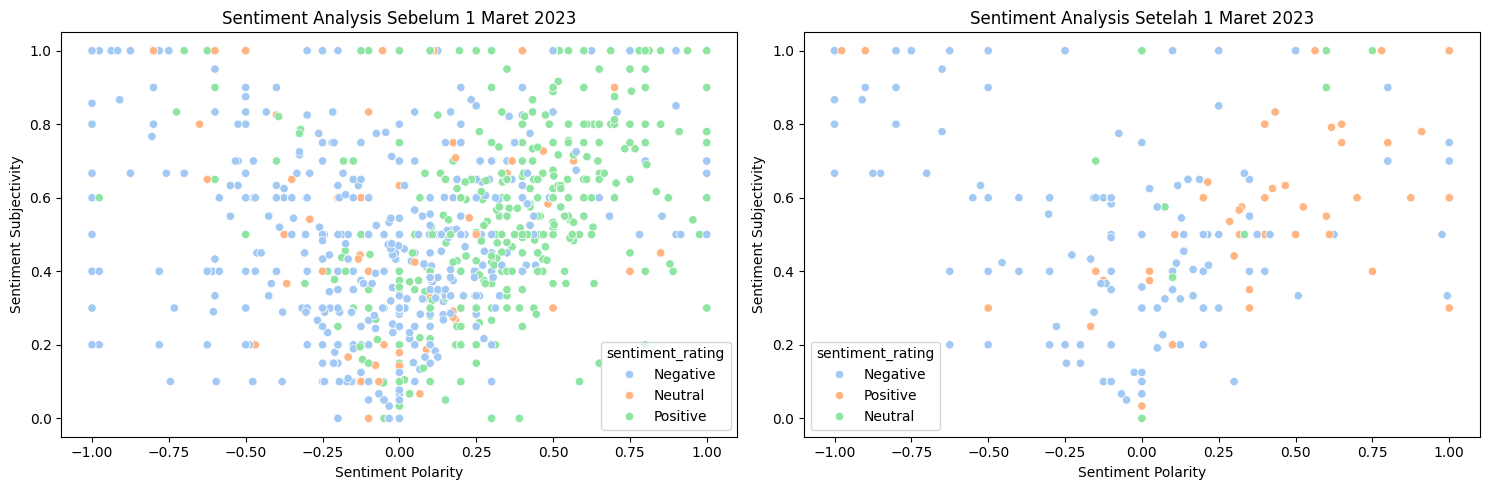

In [ ]:
# Scatter plot of sentiment polarity vs subjectivity
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=before_march['sentiment_polarity'], y=before_march['sentiment_subjective'],
                hue=before_march['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Sentiment Analysis Sebelum 1 Maret 2023")
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')

plt.subplot(1, 2, 2)
sns.scatterplot(x=after_march['sentiment_polarity'], y=after_march['sentiment_subjective'],
                hue=after_march['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Sentiment Analysis Setelah 1 Maret 2023")
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')

plt.tight_layout()
plt.show()

In [ ]:
# Mengunduh stopwords Bahasa Indonesia
nltk.download('stopwords')
stop = stopwords.words('indonesian') + ["agak", "bakal", "kemungkinan"]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in (stop)])

In [ ]:
# Menghapus stopwords untuk subset before_march
before_march['content_without_stopwords'] = before_march['content'].apply(remove_stopwords)

# Menghapus stopwords untuk subset after_march
after_march['content_without_stopwords'] = after_march['content'].apply(remove_stopwords)

<ipython-input-19-6265aac4ed85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_march['content_without_stopwords'] = before_march['content'].apply(remove_stopwords)
<ipython-input-19-6265aac4ed85>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_march['content_without_stopwords'] = after_march['content'].apply(remove_stopwords)


In [ ]:
# Menampilkan contoh data yang sudah diproses
print("Contoh hasil removing stopwords sebelum 1 Maret 2023:")
print(before_march['content_without_stopwords'].head())

print("\nContoh hasil removing stopwords setelah 1 Maret 2023:")
print(after_march['content_without_stopwords'].head())

Contoh hasil removing stopwords sebelum 1 Maret 2023:
33869    Woyyy versi terbaru gak masuk, tes heyyy haloo...
33870    blum fix dah launching launching benerin launc...
33871    Kagak sumpah, kagak daftar aplikasi bug, giman...
33872    Ketika log in sulit sekali? Jaringan provider ...
33873                                             Gak buka
Name: content_without_stopwords, dtype: object

Contoh hasil removing stopwords setelah 1 Maret 2023:
0    Lupa pin masuk dg email ga bisa. munculny pin ...
1                                                Buruk
2    Ga unduh sertif vaksin, scan barcode ga bisa. ...
3          Update kartu sehat susahhhhhhhh ....bgt, 😭😭
4    Aplikasi ga laku gila Mau login peduli lindung...
Name: content_without_stopwords, dtype: object


In [ ]:
# Menyimpan hasil ke file CSV
before_march.to_csv('satusehat_reviews_before_march_2023_stopwords_removed.csv', index=False, escapechar='\\')
after_march.to_csv('satusehat_reviews_after_march_2023_stopwords_removed.csv', index=False, escapechar='\\')

print("Hasil penghapusan stopwords disimpan ke file CSV.")

Hasil penghapusan stopwords disimpan ke file CSV.
